In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
import time
import itertools

In [2]:
df_test = pd.read_csv('/kaggle/input/mscdata/new_test_8.csv')
df_train = pd.read_csv('/kaggle/input/mscdata/new_train8_removeOutliers.csv')
X_train = df_train.drop(['Class'], axis = 1)
y_train = df_train['Class']
X_test = df_test.drop(['Class'], axis = 1)
y_test = df_test['Class']
df_test.head(5)

,Unnamed: 0,V14,V4,V11,V12,V10,V16,V9,V3,Class
0,0,-9.373859,9.505594,5.299236,-10.834006,-14.110184,-9.899247,-8.507059,-18.649853,1
1,1,-0.217884,-1.385729,-0.087670,0.979427,-0.565012,-2.142892,0.899746,-0.134070,0
2,2,-0.245772,-1.029950,0.543827,0.112453,0.756801,1.769860,-0.971747,0.168619,0
3,3,-0.550875,-0.349504,-1.328335,0.223621,-1.376648,0.497974,-0.484715,-1.669361,0
4,4,0.592634,0.327269,0.942162,0.850038,0.259452,0.091077,0.363241,-1.015839,0


In [3]:
len(y_train)

356907

In [4]:
df_train.head(5)

,Unnamed: 0,V14,V4,V11,V12,V10,V16,V9,V3,Class
0,0,0.147058,3.089998,-2.439105,-0.483654,0.640276,1.796711,-1.021919,0.740574,0
1,1,-0.436501,-1.973551,-1.033393,-0.097335,-1.369045,1.087511,0.160397,1.478135,0
2,2,0.027316,0.293150,-1.319772,0.929678,-0.193898,0.647679,0.923393,-1.641857,0
3,3,-0.076016,0.824617,-0.823684,0.745366,-0.072544,0.356027,0.025486,0.240080,1
4,4,-7.083305,4.462331,6.474231,-8.489208,-5.403415,-4.633336,-0.716052,-5.685763,1


Class as pie chart:


Text(0, 0.5, '')

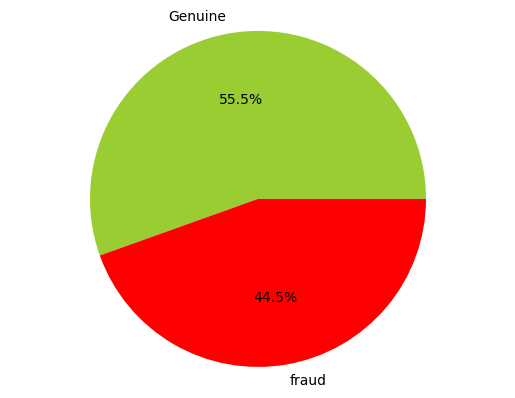

In [5]:
print("Class as pie chart:")
fig, ax = plt.subplots(1,1)
ax.pie(df_train.Class.value_counts(), autopct = '%1.1f%%', labels = ['Genuine', 'fraud'], colors = ['yellowgreen', 'r'])
plt.axis('equal')
plt.ylabel('')

In [3]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [4]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

drop_list = []
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

end_time = time.time()
elapsed_time = end_time - start_time 
print("Elapsed time:", elapsed_time, "seconds")

train-set confusion matrix:
 [[197876     84]
 [ 40693 118254]]
test-set confusion matrix:
 [[85266    41]
 [   23   113]]
recall score:  0.8308823529411765
precision score:  0.7337662337662337
f1 score:  0.7793103448275862
accuracy score:  0.9992509626300574
ROC AUC: 0.984137223412464
Elapsed time: 0.4183938503265381 seconds


In [13]:
# Utilized the original unbalanced dataset
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

df = pd.read_csv("/kaggle/input/dataset11/data_scaled.csv")
y = df['Class']
X = df.drop(columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_time = time.time()

drop_list = []
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

end_time = time.time()
elapsed_time = end_time - start_time 
print("Elapsed time:", elapsed_time, "seconds")

train-set confusion matrix:
 [[222611   4840]
 [    66    328]]
test-set confusion matrix:
 [[55619  1245]
 [   18    80]]
recall score:  0.8163265306122449
precision score:  0.06037735849056604
f1 score:  0.11243851018973998
accuracy score:  0.9778273234788104
ROC AUC: 0.9669878291778162
Elapsed time: 0.22783255577087402 seconds


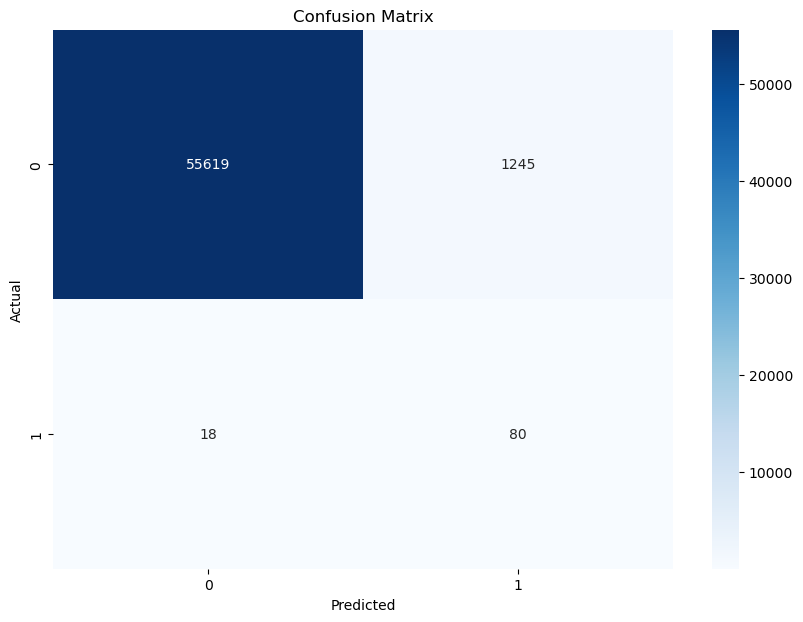

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
df_train = pd.read_csv('/kaggle/input/mscdata/new_train8_removeOutliers.csv')
h = 5000
random_seed = 42
df_train = df_train.sample(h, random_state = random_seed)
X_train = df_train.drop(['Class'], axis = 1)
y_train = df_train['Class']

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}
from sklearn.model_selection import GridSearchCV
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, /
                            n_jobs=-1, verbose=7).fit(X_train, y_train)

svm = SVC(C = best_params['C'], kernel=best_params['kernel'], /
          probability=True).fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


In [ ]:
svm_cv_model.best_score_

In [ ]:
best_params = svm_cv_model.best_params_
print(best_params)

In [10]:
# SVM
from sklearn import svm
model = svm.SVC(C = 7,kernel='linear')

start_time_1 = time.time()
model.fit(X_train, y_train)
end_time_1 = time.time()

start_time_2 = time.time()
y_predict = model.predict(X_test)
end_time_2 = time.time()

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

elapsed_time_1 = end_time_1 - start_time_1
elapsed_time_2 = end_time_2 - start_time_2 

print(elapsed_time_1)
print(elapsed_time_2)

Accuracy Score is 0.99109
       0    1
0  84561  746
1     15  121
345.3330554962158
4.267910480499268


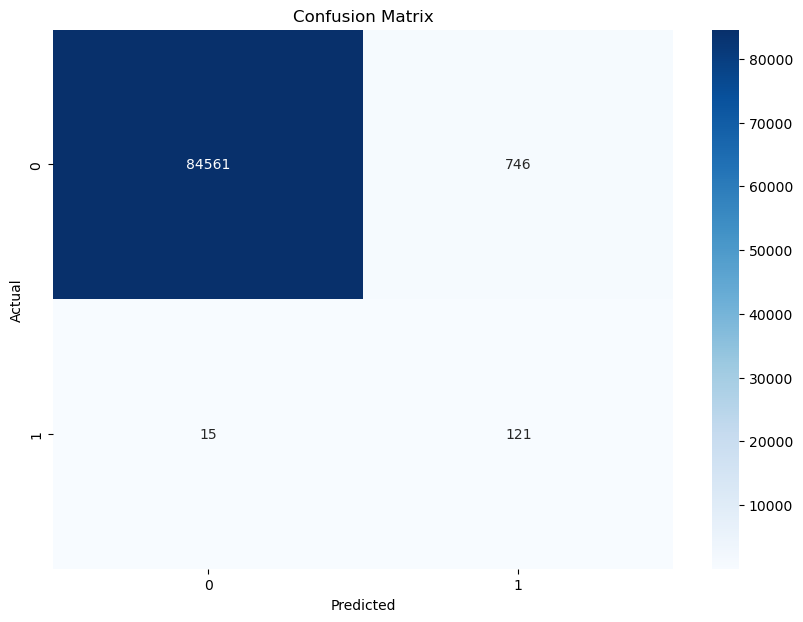

In [13]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()